# Time Series Analysis


## Time Series Analysis - Part 1: Stationarity, Autocorrelation and White Noise


In [35]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [34]:
import auquanToolbox.dataloader as dl

end = '2016-01-01'
start = '2007-01-01'
symbols = ['SPX']#,'DOW','MSFT']
data = dl.load_data_nologs('nasdaq', symbols , start, end)['ADJ CLOSE']
# log returns
lrets = np.log(data/data.shift(1).dropna())

## Stationarity

Stationarity is an extremely important aspect of time series -  much of the analysis carried out on financial time series data involves identifying if the series we want to predict is stationary, and if it is not,finding ways to transform it such that it is stationary. 

*Mean of a time series $x_t$ is $E(x_t)=\mu(t)$*

*Variance of a time series $x_t$ is $\sigma^2(t)=E[(x_t - \mu(t))^2]$*

**A time series is stationary in the mean if $\mu(t)=\mu$, i.e.mean is constant with time**

**A time series is stationary in the variance if $\sigma^2(t)=\sigma^2$, i.e. variance is constant with time**


### Why do we care about stationarity? 

## Serial Correlation (Autocorrelation)

A time series model decomposes the series into 4 components: trend, seasonal, cyclical, and random. 

The random component is called the residual or error - the difference between our predicted value(s) and the observed value(s). Autocorrelation is when these residuals (errors) are correlated with each other. That is, if the error of the $i_{th}$ is dependent on errors of any of the terms $0 .. i-1$ before. Essentially, it tells us how sequential observations in a time series affect each other. 


### Why Do We Care about Serial Correlation? 

Serial correlation is critical for the validity of our model predictions - The residuals (errors) of a stationary TS are serially uncorrelated by definition. It is critical we account for autocorrelation in our model otherwise the standard errors of our estimates for the parameters will be biased and underestimated, making any tests that we try to form using the model invalid In layman's terms, ignoring autocorrelation means we're likely to draw incorrect conclusions about the impact of the independent variables in our model.

## White Noise

By definition *a time series that is a white noise process has serially uncorrelated errors and the expected mean of those errors is equal to zero.* This means that the errors(residuals) are completely drawn at random from some probability distribution, i.e it is independent and identically distributed (i.i.d.). 

If our time series model results in white noise residuals, it means we have successfully captured the underlying process and explained any form of correlation, only leaving errors(residuals) which are completely random. Our predicted values differ from the observed values only by a random error component that cannot be forecasted or modeled.

Most of time series analysis is literally trying to fit a model to the time series such that the residual series is indistinguishable from white noise.

Let's simulate a white noise process and view it.

In [4]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

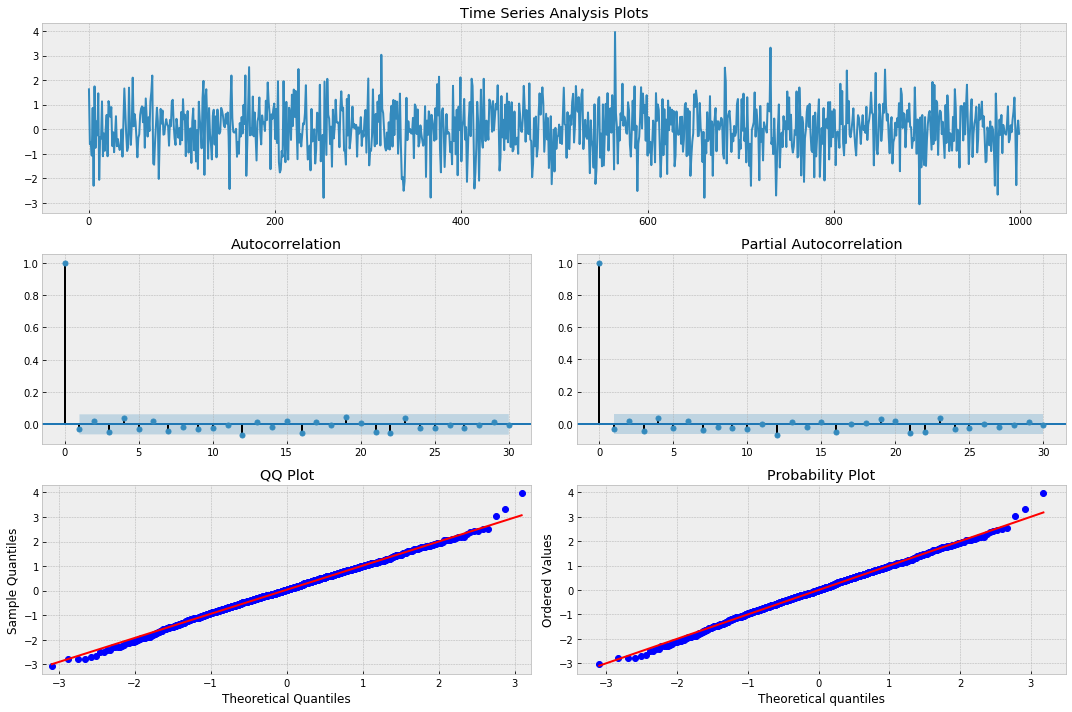

In [5]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

### A word on the plots here:

* The top plot is the values of time series itself 
* The second row has plots of autocorrelation (ACF) and partial autocorrelation (PACF). The PACF is partial correlation between residuals, controlling for shorter lags.
 * The x axis shows the values of the lag, $k$ and the blue shaded region show significance boundaries. Only values that lie outside the blue region are significant
* The third row has QQ plots and probability plots
 * QQ plot compares two probability distributions by plotting their quantiles against each other - If the two distributions are similar (or linearly related), the points in the Q–Q plot will approximately lie on a line. For this discussion, we are comparing the distribution of our residuals with a normal distribution
 * Similarly, normal probability plot also asseses whether or not a data set is approximately normally distributed. The data are plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line. Departures from this straight line indicate departures from normality.

We note the following:

* The process appears to be random and centered about zero
* The autocorrelation (ACF) and partial autocorrelation (PACF) plots also indicate no significant serial correlation (Remember we should see approximately 5% significance in the autocorrelation plots due to pure chance as a result of sampling from the Normal distribution)
* Below that we can see the QQ and Probability Plots, which compares the distribution of our data with standard normal distribution are straight lines

In [6]:
print("Random Series\n -------------\nmean: %.3f \nvariance: %.3f \nstandard deviation: %.3f"
      %(randser.mean(), randser.var(), randser.std()))

Random Series
 -------------
mean: 0.039 
variance: 0.962 
standard deviation: 0.981


Clearly our data is distributed randomly, and appears to follow Gaussian (Normal) white noise, as it should. 

## Random Walk

A random walk is a time series model where the value of the time series variable increases or decreases (step up or down) with equal probability at each time step, that is the expected value of current observation is equal to the previous observation. It is formally defined below:

$$x_t=x_{t-1}+w_t$$ , where $w_t$ is a discrete white noise series.
$$E[x_t]=x_{t-1}$$

This means if the TS we are modeling is a random walk it is unpredictable, as they are literally random walks.

The significance of a random walk is that it is non-stationary because while the mean of a random walk is still zero, the covariance is actually time-dependent. In particular, the covariance is equal to the variance multiplied by the time. Hence, as time increases, so does the variance.

Let's simulate a random walk 

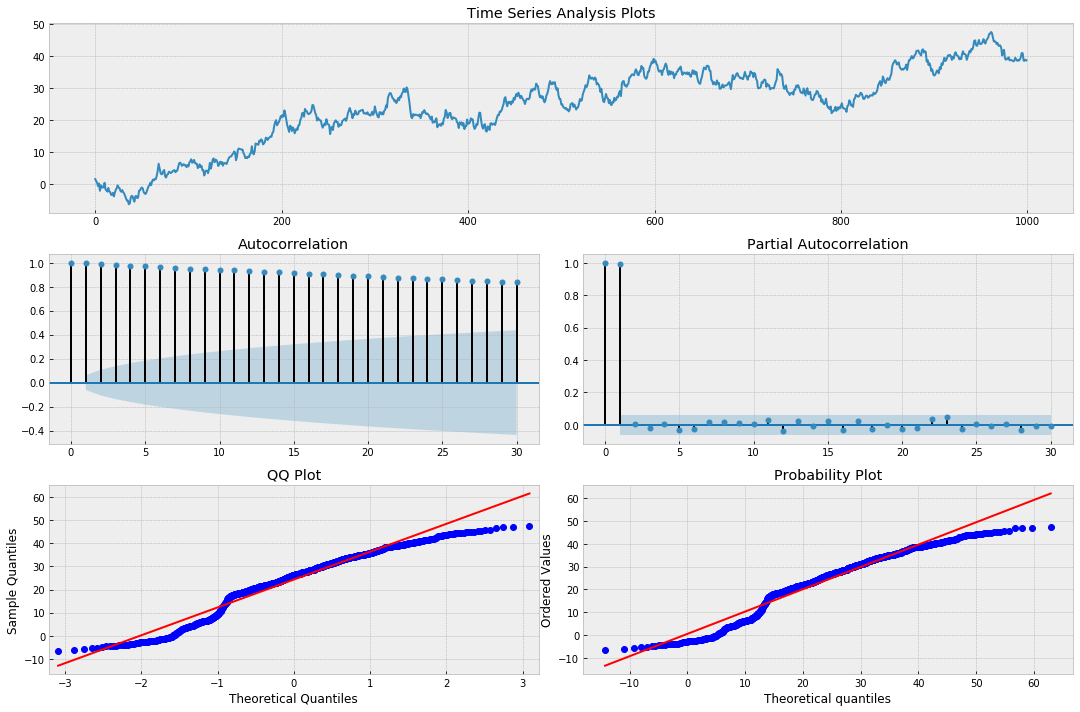

In [7]:
# Random Walk without a drift

np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

Clearly our TS is not stationary. How to check if the random walk model is a good fit for our simulated data? We have

$$x_t - x_{t-1} = w_t$$ , where $w_t$ is a discrete white noise series.

The first differences of our random walk series should equal a white noise process!

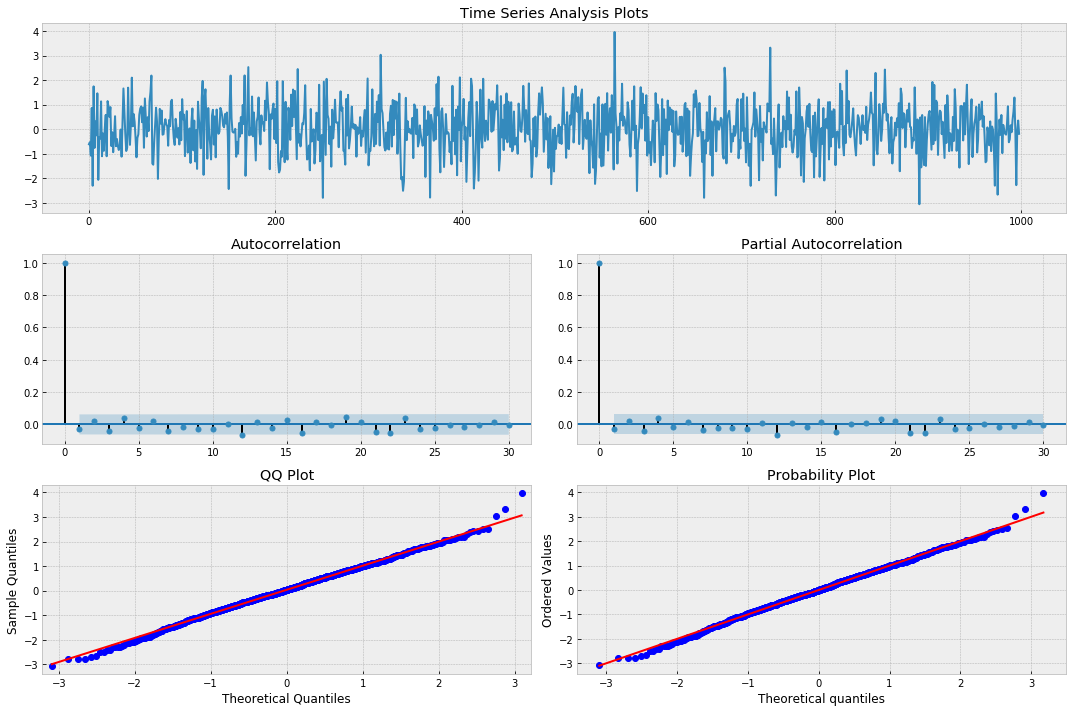

In [8]:
# First difference of simulated Random Walk series
_ = tsplot(np.diff(x), lags=30)

As expected, the difference is indeed white noise.

Let's now apply our random walk model to some actual financial data. 

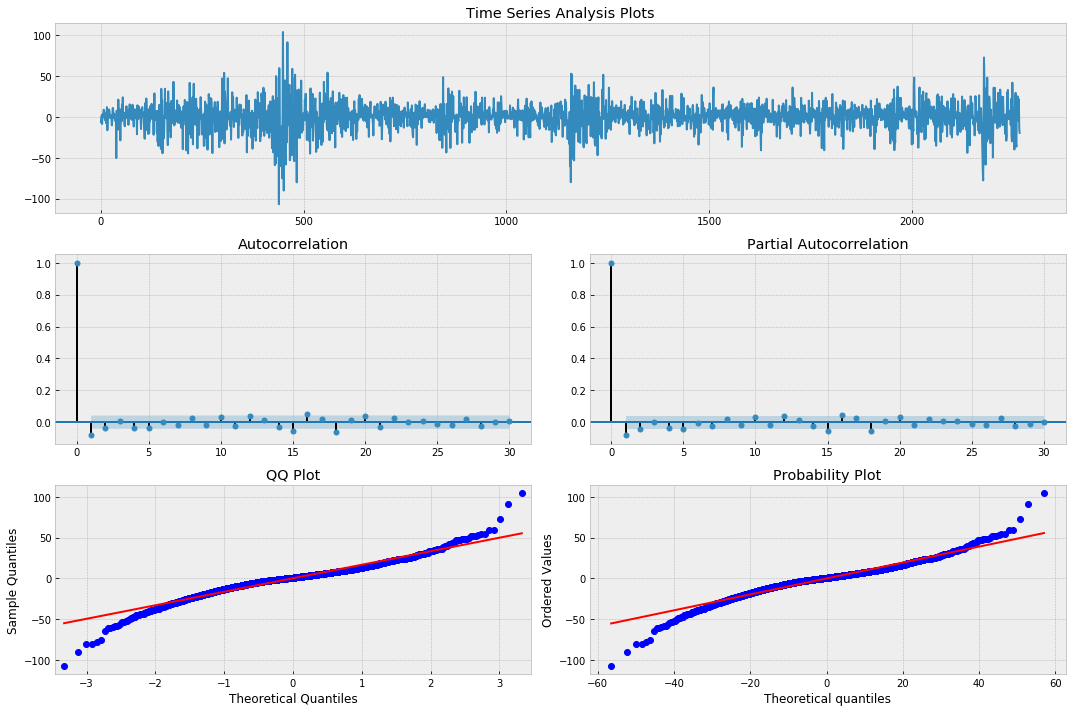

In [9]:
# First difference of SPY prices
_ = tsplot(np.diff(data.SPX), lags=30)

It's quite similar to white noise, isn't it? However, there appears to be some significant serial correlation in the ACF, and PACF plots around lags 1, 10, 15, 18 and 21. Also notice the shape of the QQ and Probability plots. This indicates that the process is close to normality but with 'heavy tails'. This means that there should be better models to explain the price of S&P 500.

Let's try the same on other equities'

Again the time series is quite similar to white noise with similar 'heavy tails' a few peaks in the ACF, and PACF plots.

Before we conclude, let's talk about two more simple TS models.

## Linear Models

Linear models aka trend models represent a TS that can be graphed using a straight line. The basic equation is:
$$x_{t} = a_0+a_1 t + b$$

The value of the time series is determined by the coefficients, $a_0, a_1$ and *time*. An example could be a company's sales that increase by the same amount at each time step. For a hypothetical example, consider a company who's stock price was a 100$ to start, and increase by 50c at every time step. 

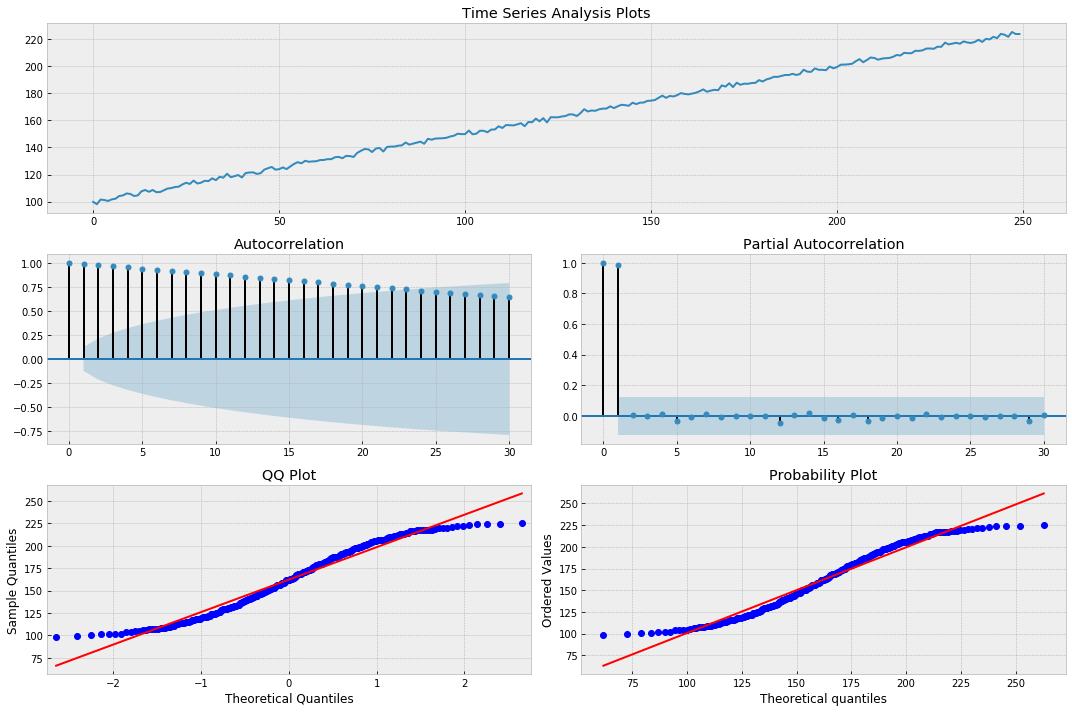

In [10]:
# simulate linear trend

w = np.random.randn(250)
x = np.empty_like(w)

a0 = 100.
a1 = 0.5
for t in range(len(w)):
    x[t] = a0 + a1*t + w[t]
    
_ = tsplot(x, lags=30)  

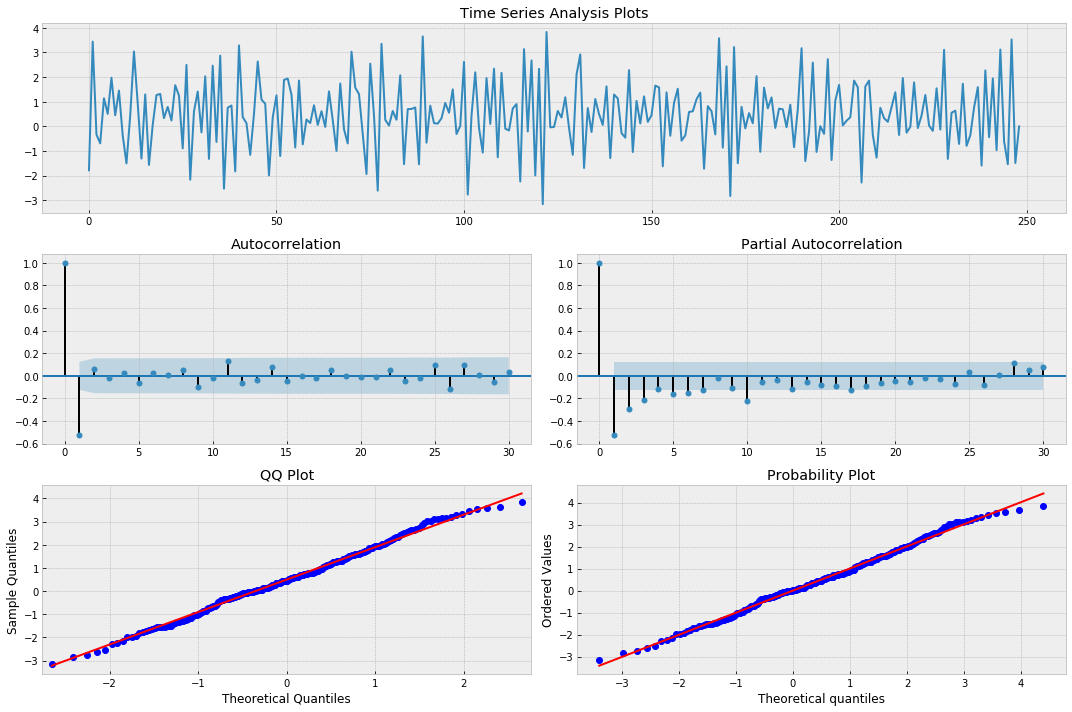

In [11]:
# First difference of simulated prices
_ = tsplot(np.diff(x), lags=30)

Here we can see that the residuals of the model are correlated. Though the distribution is approximately normal, before using this model to make predictions we would have to account for and remove the obvious autocorrelation (the significant value at lag 1) present in the series. The significance of the PACF at lag 1 indicates that an autoregressive model may be appropriate.

## Log-Linear Models

Similar to linear models except that the TS that can be graphed using an exponential function. That is the time series has a constant rate of change with respect to each time step. 
$$x_{t} = exp(a_0+a_1 t)$$
$$log(x_{t}) = a_0+a_1 t$$
$$x_0 = exp(a_0)$$
$$x_t = x_{t-1}*exp(a1)$$
For example, in our above simulated series, if the stock price increased by X% at each time step, you get a curve that looks like this:

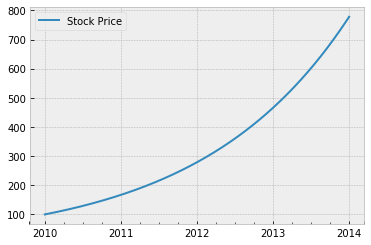

In [12]:
# Simulate exponential growth

idx = pd.date_range('2010-01-01', '2014-01-01', freq='D')
price = [np.exp( 4.605 + float(x)/712 ) for x in range(0, len(idx))]

# create dataframe and plot
df = pd.DataFrame(price, columns=['Stock Price'], index=idx)

with plt.style.context('bmh'):
    df.plot()

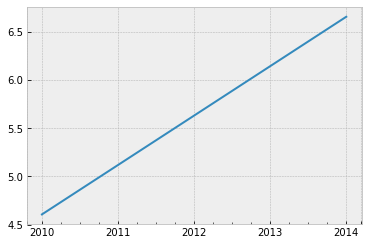

In [13]:
# log of prices

with plt.style.context('bmh'):
    pd.Series(np.log(price), index=idx).plot()

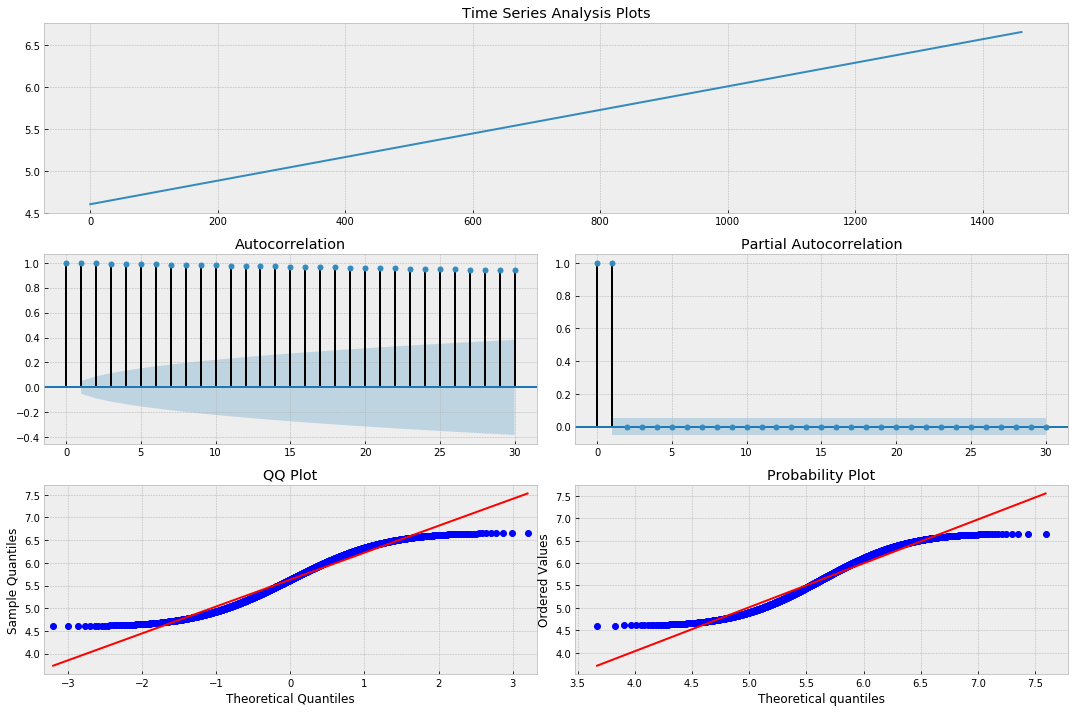

In [14]:
_ = tsplot(np.log(price), lags=30) 

This notebook provides a basic overview of time series analysis. The tests for stationarity, random walk are a common process we will keep visiting in further notebooks. We're next going to talk about more sophisticated time series models.

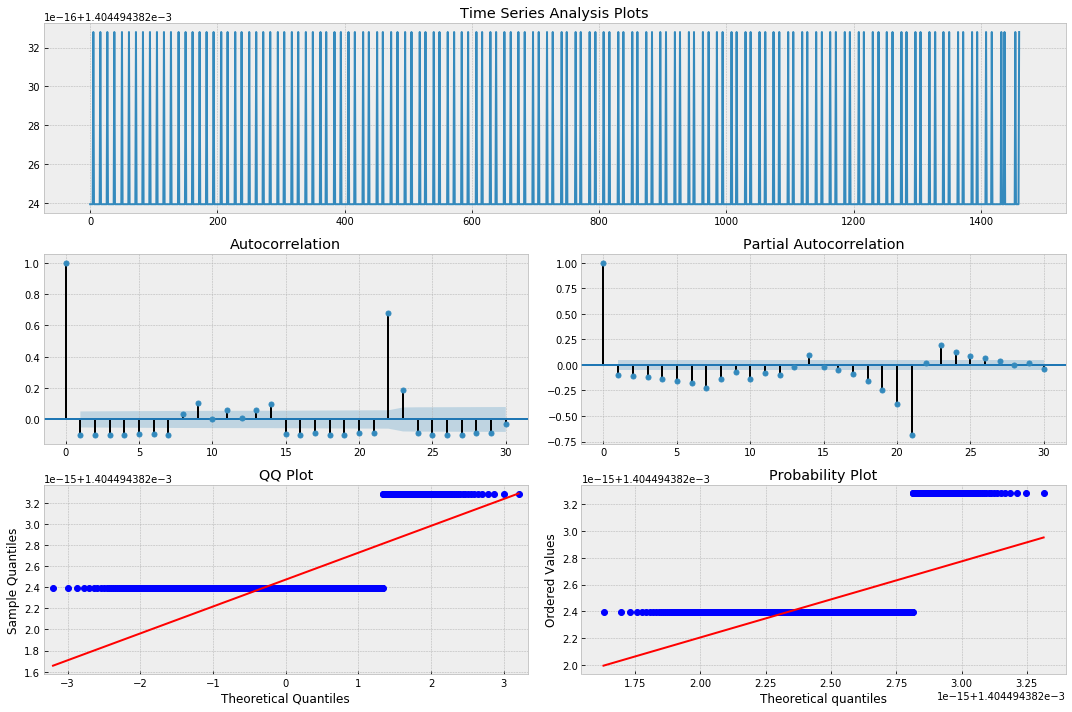

In [15]:
_ = tsplot(np.diff(np.log(price)), lags=30) 

## Time Series Analysis - Part 2 :  Auto Regressive(AR) and  Moving Average(MA)

In [16]:
import statsmodels.stats as sms

### Autoregressive Models of order p $AR(p)$

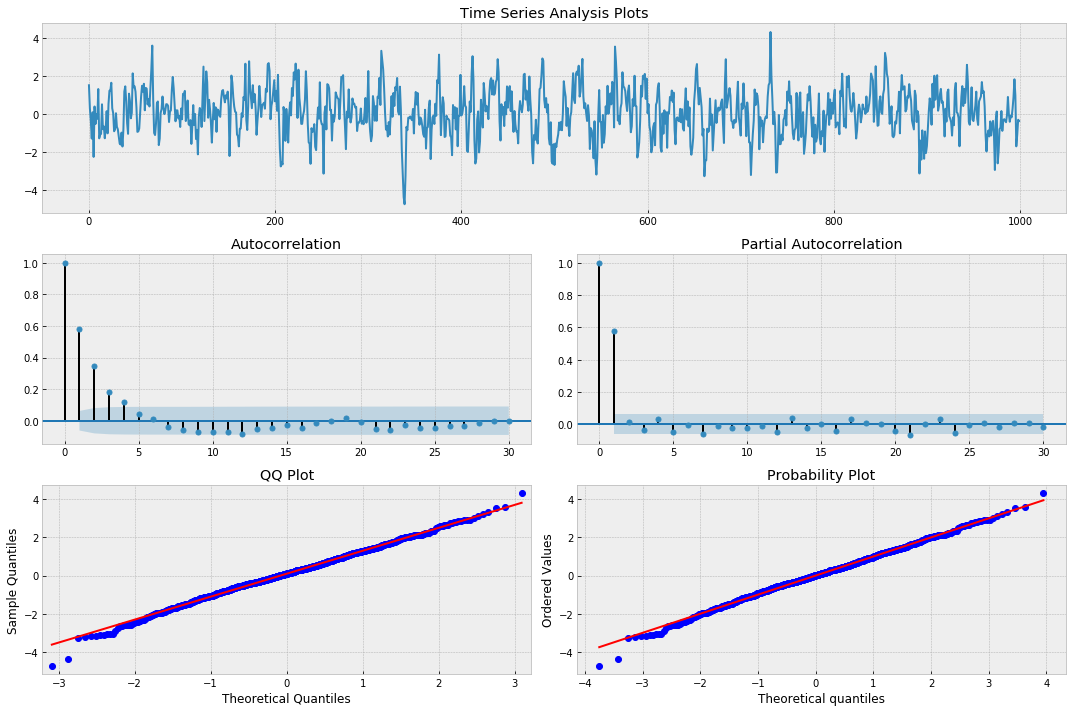

In [17]:
# Simulate an AR(1) process with a = 0.6

np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
_ = tsplot(x, lags=30)

Note the distribution of our simulated AR(1) model is normal but there is significant serial correlation between lagged values visible in the ACF and PACF plots.

PACF plots are used to identify the extent of the lag in an autoregressive mode. If we find no significant correlation in a PACF plot after lag $k$, an AR(k) model is usually a good fit. Looking at this chart, we can hypothesize that a AR(1) model should fit.


#### Data Fitting
Now we can fit an AR(p) model using Python's statsmodels to estimate the alpha coefficient and order. If the AR model is correct the estimated alpha coefficient will be close to our true alpha of 0.6 and the selected order will equal 1.

In [18]:
# Fit an AR(p) model to simulated AR(1) model with alpha = 0.6

mdl = sm.tsa.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = sm.tsa.AR(x).select_order( maxlag=30, ic='aic', trend='nc')

true_order = 1
print('\nalpha estimate: %3.5f | order_estimate %s'%(mdl.params, est_order))
print('\ntrue alpha = %s | true order = %s'%(a, true_order))


alpha estimate: 0.58227 | order_estimate 1

true alpha = 0.6 | true order = 1


Awesome!

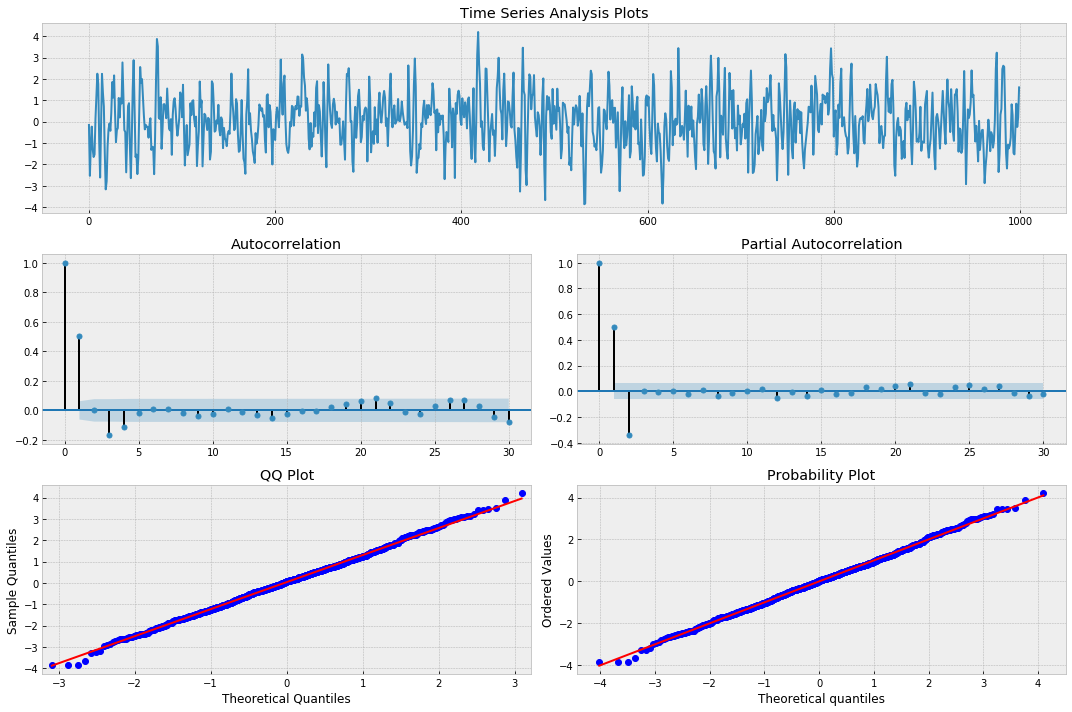

In [19]:
# Simulate an AR(2) process

n = int(1000)
alphas = np.array([.666, -.333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=30)

There is significant serial correlation between lagged values at lag 1 and 2 now, as evidenced by the PACF plot.Let's see if we recover the underlying parameters of our simulated data. 

In [20]:
# Fit an AR(p) model to simulated AR(2) process

max_lag = 10
mdl = smt.AR(ar2).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(ar2).select_order( maxlag=max_lag, ic='aic', trend='nc')

true_order = 2
print('\ncoef estimate: %3.4f %3.4f | order estimate %s'%(mdl.params[0],mdl.params[1],est_order))


coef estimate: 0.6760 -0.3393 | order estimate 2


### Note on choosing the number of lags

If we just naively fit a model, it will estimate quite a few parameters. See below

In [21]:
mdl = smt.AR(ar2).fit()
print 'Parameters'
print mdl.params
print 'Standard Error'
print mdl.bse

Parameters
[ 3.57345632e-02  6.67118523e-01 -3.40041205e-01  9.01909128e-03
 -1.11520048e-02  2.14435279e-02 -4.83381895e-02  3.28287551e-02
 -2.38531001e-02 -4.90031065e-04 -3.12735473e-02  5.21112625e-02
 -5.85303137e-02  2.17108859e-02 -5.58739239e-02  2.79663351e-02
 -6.45697812e-03 -2.90269682e-02  3.79624698e-02  1.12370300e-02
  2.54545125e-03  5.79634021e-02]
Standard Error
[0.03330767 0.03229192 0.03882052 0.04032568 0.04032737 0.04031148
 0.04030305 0.04029053 0.04027444 0.04025271 0.04022384 0.04018031
 0.0402171  0.04026555 0.04027908 0.04028844 0.04027529 0.04028007
 0.04028697 0.04034915 0.03870137 0.03212717]


In this case we know there are too many because we simulated the data as an AR(2) process. 

AR models will estimate many more lags than is actually the case is due to indirect dependency - if $X_t$ depends on  $X_{t−1}$ which depends on $X_{t−2}$, then indirectly $X_t$ it will depend on  $X_{t−2}$ . In the presence of more than one lag indirect dependencies will be picked up by a simple estimation.

However, we want the fewest parameters that yield a good model, that explain what is happening. Any additional and unwanted parameters will lead to Overfitting.

Observing the ACF and PACF indicates that only the first 2 lags may be useful. However, we will empericially test the number of lags by using some form if information criterion(specifically [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion)). Python does this for us when we specify 'maxlag' and 'ic' to the fit function. To try it yourself, compute the AIC for all models we wish to consider, and note the smallest AIC. This model minimizes information loss and gives the best number of parameters

In [22]:
N = 10
AIC = np.zeros((N, 1))

for i in range(N):
    model = smt.AR(ar2)
    model = model.fit(maxlag=(i+1))
    AIC[i] = model.aic
    
AIC_min = np.min(AIC)
model_min = np.argmin(AIC)

print 'Number of parameters in minimum AIC model %s' % (model_min+1)

Number of parameters in minimum AIC model 2


In [23]:
AIC

array([[0.18855675],
       [0.06334307],
       [0.06608118],
       [0.06896158],
       [0.06974896],
       [0.07142829],
       [0.07361059],
       [0.07502689],
       [0.07765342],
       [0.0787022 ]])

### Evaluating Residuals
The final step after fitting our model is to evaluate its residual behavior. Rememeber we mentioned earlier that our aim is to find a model fit for our time series such that the residuals are white noise.

Let's check for normality of the residuals here.

In [24]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

print pvalue

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

0.7082410761740549
The residuals seem normally distributed.


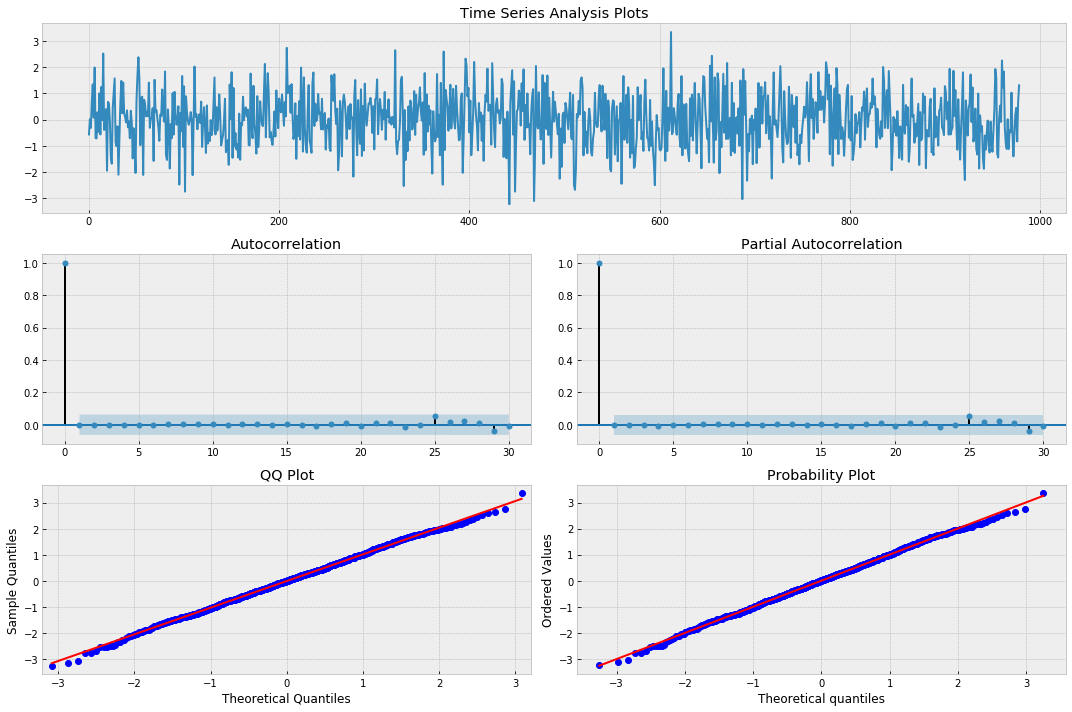

In [25]:
tsplot(mdl.resid, lags=30)

## Moving Average Models - MA(q)

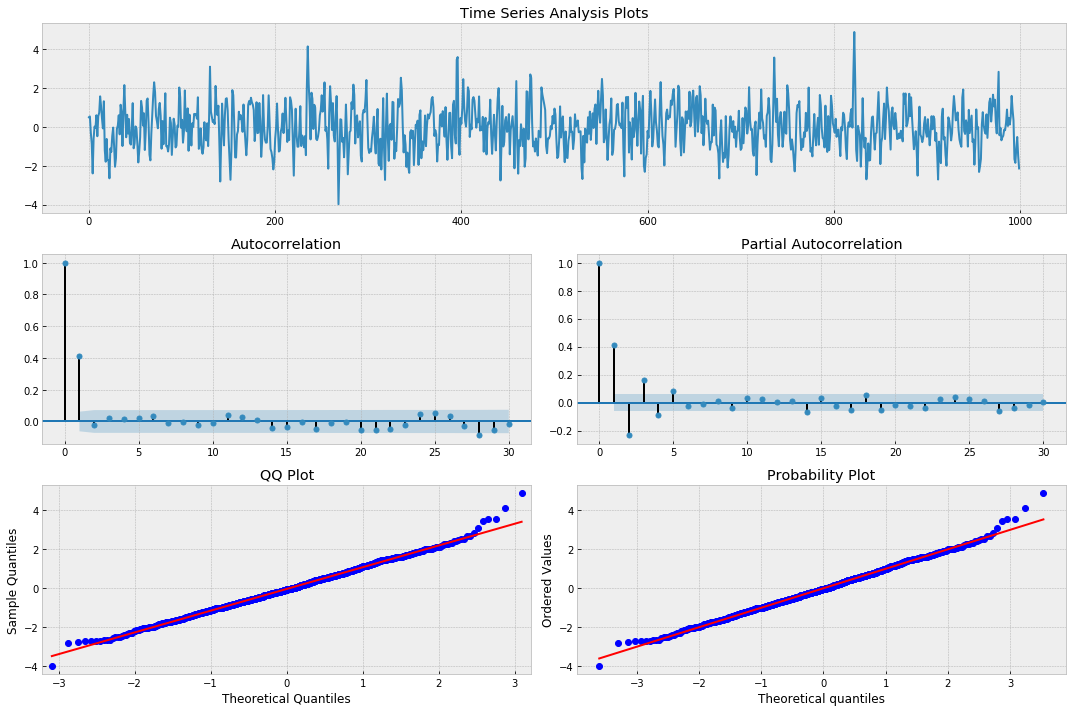

In [26]:
# Simulate an MA(1) process

n = int(1000)

# set the AR(p) alphas equal to 0
# alphas are for AR
# betas are for MA
alphas = np.array([0.])
betas = np.array([0.6])

# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ma1, lags=30)

Since q=1, we expect a significant peak at k=1 at ACF and then insignificant peaks subsequent to that. 

Just like we use PACF for AR(p) models, this is a useful way of seeing whether an MA(q) model is appropriate. By taking a look at the ACF of a particular series we can see how many sequential non-zero lags exist. If q such lags exist then we can legitimately attempt to fit a MA(q) model to a particular series.

The ACF function shows that lag 1 is significant which indicates that a MA(1) model may be appropriate for our simulated series. We can now attempt to fit a MA(1) model to our simulated data. 

In [36]:
# Fit the MA(1) model to our simulated time series
# Specify ARMA model with order (p, q)

max_lag = 30
mdl = smt.ARMA(ma1, order=(0, 1)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1390.513
Method:                           mle   S.D. of innovations              0.972
Date:                Wed, 14 Feb 2018   AIC                           2785.025
Time:                        13:27:36   BIC                           2794.841
Sample:                             0   HQIC                          2788.756
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5874      0.026     22.762      0.000       0.537       0.638
                                    Roots                                    
                 Real           Imaginary           M

The model was able to correctly estimate the lag coefficent as 0.58 is close to our true value of 0.6. Also notice that our 95% confidence interval does contain the true value. 

In [37]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

The residuals seem normally distributed.


Let's try simulating an MA(3)  process, then try to fit a third order MA model to the series and see if we can recover the correct lag coefficients ($\beta s$). Betas 1-3 are equal to 0.3, 0.2, and 0.1 respectively.
This time we should expect significant peaks at k = {1,2,3}, and insignificant peaks for k>3 in ACF plots.

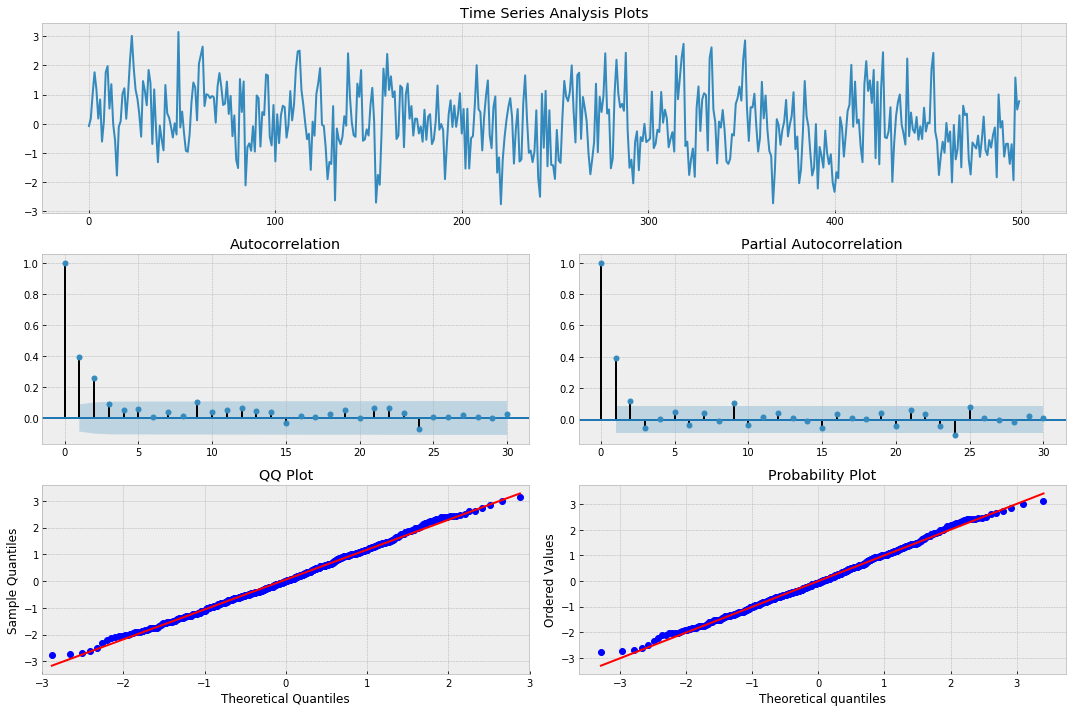

In [29]:
# Simulate MA(3) process with betas 0.3, 0.2, 0.1

n = int(500)
alphas = np.array([0.])
betas = np.array([0.3, 0.2, 0.1])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(ma3, lags=30)

In [30]:
# Fit MA(3) model to simulated time series

max_lag = 30
mdl = smt.ARMA(ma3, order=(0, 3)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(0, 3)   Log Likelihood                -719.764
Method:                           mle   S.D. of innovations              1.021
Date:                Wed, 14 Feb 2018   AIC                           1447.528
Time:                        13:23:20   BIC                           1464.387
Sample:                             0   HQIC                          1454.143
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.3554      0.045      7.965      0.000       0.268       0.443
ma.L2.y        0.2589      0.045      5.740      0.000       0.171       0.347
ma.L3.y        0.0634      0.044      1.440      0.1

In [31]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

The residuals seem normally distributed.


Let's also try to fit a MA(3) model to the SPX log returns and plot residuals again. 

                              ARMA Model Results                              
Dep. Variable:                    SPX   No. Observations:                 2267
Model:                     ARMA(0, 3)   Log Likelihood                6538.981
Method:                           mle   S.D. of innovations              0.014
Date:                Wed, 14 Feb 2018   AIC                         -13069.961
Time:                        13:23:20   BIC                         -13047.056
Sample:                    12-29-2006   HQIC                        -13061.604
                         - 12-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.SPX     -0.1094      0.021     -5.217      0.000      -0.151      -0.068
ma.L2.SPX     -0.0574      0.022     -2.640      0.008      -0.100      -0.015
ma.L3.SPX      0.0238      0.021      1.156      0.2

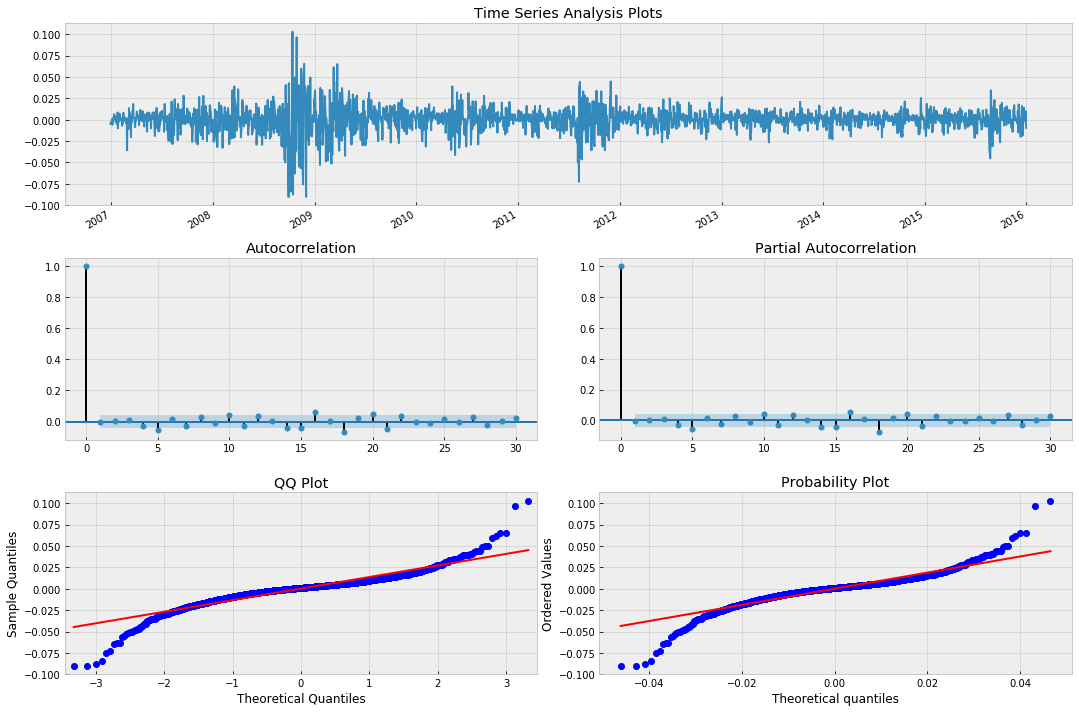

In [32]:
# Fit MA(3) to SPX log returns

max_lag = 30
Y = lrets.SPX.dropna()
mdl = smt.ARMA(Y, order=(0, 3)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)

The model was able to estimate the real coefficients effectively. Our 95% confidence intervals also contain the true parameter values of 0.3, 0.2, and 0.1. 

Now let's follow the earlier exercise and fit a MA(1) model to the AAPL log returns and plot residuals again. Keep in mind we do not know the true parameter values.

We see significant peaks at many longer lags in the residuals. Once again, we find the MA(3) model is not a good fit.

In [33]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

We have reason to suspect the residuals are not normally distributed.


We've now examined two major time series models in detail, namely the Autogressive model of order p, AR(p) and then Moving Average of order q, MA(q). We've seen that they're both capable of explaining away some of the autocorrelation in the residuals of first order differenced daily log prices of equities and indices, but volatility clustering and long-memory effects persist.

It is finally time to turn our attention to the combination of these two models, namely the Autoregressive Moving Average of order p,q, ARMA(p,q) to see if it will improve the situation any further.

## Time Series Analysis - Part 3 :  ARMA and ARIMA models



### Autoregressive Moving Average Models - ARMA(p, q)

ARMA model is simply the merger between AR(p) and MA(q) models:

* AR(p) models try to capture (explain) the momentum and mean reversion effects often observed in trading markets (market participant effects). 
* MA(q) models try to capture (explain) the shock effects observed in the white noise terms. These shock effects could be thought of as unexpected events affecting the observation process e.g. Surprise earnings, A terrorist attack, etc.

Hence, an ARMA model attempts to capture both of these aspects when modelling financial time series. Note that an ARMA model does not take into account volatility clustering, a key empirical phenomena of many financial time series which we will discuss later. 

$$x_t=\alpha_1x_{t-1}+…+\alpha_px_{t-p}+w_t+\beta_1w_{t-1}+…+\beta_qw_{t-q}$$ 

Where $w_t$ is white noise with $E(w_t)=0$ and variance $\sigma^2$

An ARMA model will often require fewer parameters than an AR(p) or MA(q) model alone. That is, it is redundant in its parameters

Let's simulate an ARMA(2, 2) process with given parameters, then fit an ARMA(2, 2) model and see if it can correctly estimate those parameters. Set alphas equal to [0.5,-0.25] and betas equal to [0.5,-0.3]. 

## to be continued...